<a href="https://colab.research.google.com/github/shemalperera/FacialEmotionsOPENCV/blob/main/Face_Emotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opendatasets

In [2]:
import opendatasets as od #{"username":"shemalperera","key":"9d809292afdcc8ac71967c0634ad9fd6"}
import pandas

In [3]:
od.download("https://www.kaggle.com/datasets/msambare/fer2013")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shemalperera
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013


100%|██████████| 60.3M/60.3M [00:00<00:00, 129MB/s]


In [4]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

In [5]:
train_data_dir = '/content/fer2013/train'
test_data_dir = '/content/fer2013/test'

In [6]:
train_data = ImageDataGenerator(
    rescale = 1./255,      #each pixel scaled down to the range [0, 1] #helps in faster convergence during training
    rotation_range=30,     #randomly rotates(robustness)
    shear_range=0.3,       #slanting the image
    zoom_range=0.3,
    horizontal_flip=True,  #flipping through vertical line
    fill_mode='nearest'    #how to fill new pixels created due to transformations
)

test_data = ImageDataGenerator(rescale=1./255)

In [7]:
#data augmentation
train_generator = train_data.flow_from_directory(
    train_data_dir,
    color_mode='grayscale',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',     #classification
    shuffle=True
)

validation_generator = test_data.flow_from_directory(
    test_data_dir,
    color_mode='grayscale',
    target_size=(48,48),
    batch_size=32,
    class_mode='categorical',     #classification
    shuffle=True
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [8]:
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

In [9]:
img, label = train_generator.__next__()  #retrieve a batch of images and their corresponding labels from a data generator in Keras

In [10]:
#img.shape    #NumPy array of shape (batch_size, height, width, channels)
#label.shape  #labels for the images in the batch

In [11]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                   

In [14]:
#to count the test and train dataset
num_train = 0
for root, dirs, files in os.walk(train_data_dir):
  num_train += len(files)

num_test = 0
for root, dirs, files in os.walk(test_data_dir):
  num_test += len(files)

print(num_train)
print(num_test)

28709
7178


**Training the Model**

In [15]:
epochs = 250
history = model.fit(train_generator,
                    steps_per_epoch=num_train//32,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=num_test//32)

IndentationError: unexpected indent (<ipython-input-15-2925b9690ba7>, line 3)

**Saving the Model**

In [ ]:
#model.save('/content/drive/MyDrive/Colab Notebooks/Facial Emotions/face_emotions_model1.h5')

In [ ]:
Visualizing Model Architecture

In [17]:
pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 14.2 MB/s eta 0:00:00


In [36]:
pip install ImageFont

ERROR: Could not find a version that satisfies the requirement ImageFont (from versions: none)
ERROR: No matching distribution found for ImageFont


**Visualizing the Model**

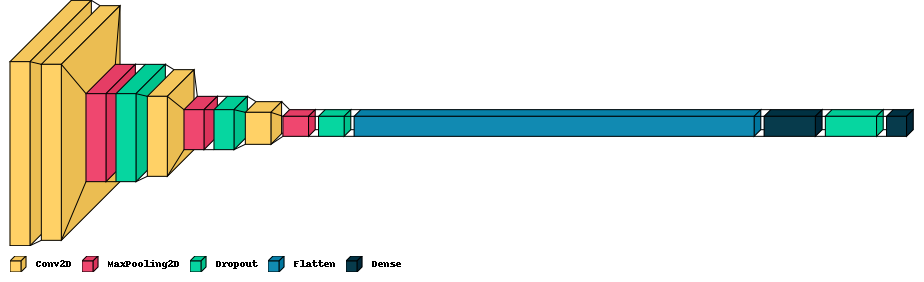

In [45]:
#Visualizing the Model
import visualkeras
from PIL import ImageFont

font = ImageFont.load_default()
visualkeras.layered_view(model, legend=True, font=font) # selected font